## Suicide Rates and Mental Health Facilities.

## Exploratory Analysis
To begin this exploratory analysis, first use `matplotlib` to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There are 4 csv files in the current version of the dataset:


In [2]:
for dirname, _, filenames in os.walk('D:/MH/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


D:/MH/Age-standardized suicide rates.csv
D:/MH/Crude suicide rates.csv
D:/MH/Facilities.csv
D:/MH/Human Resources.csv
D:/MH/sample_submission.csv
D:/MH/Submission.csv
D:/MH/test.csv
D:/MH/train.csv
D:/MH/Variable_explanations.csv
D:/MH/fer2013\fer2013\fer2013.bib
D:/MH/fer2013\fer2013\fer2013.csv
D:/MH/fer2013\fer2013\README


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check Age-standardized suicide rates.csv

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Age-standardized suicide rates.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('D:/MH/Age-standardized suicide rates.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Age-standardized suicide rates.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 549 rows and 6 columns


Let's take a quick look at what the data looks like:

In [7]:
df1.head(5)

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7
3,Albania,Both sexes,5.6,5.3,7.7,5.8
4,Albania,Male,7.0,6.7,9.5,8.2


Distribution graphs (histogram/bar graph) of sampled columns:

<ipython-input-3-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


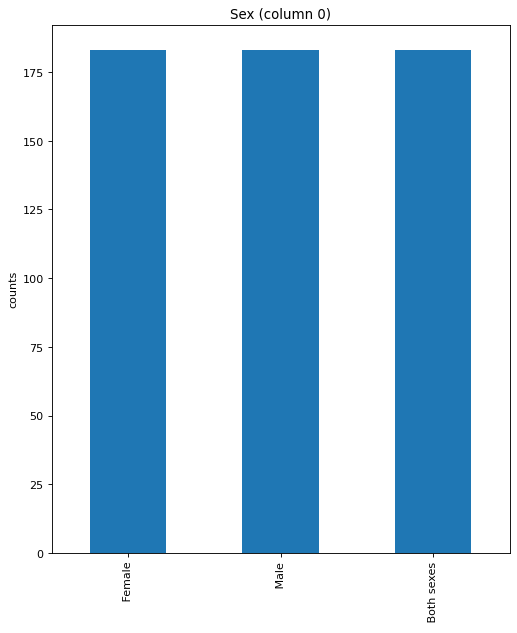

In [8]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

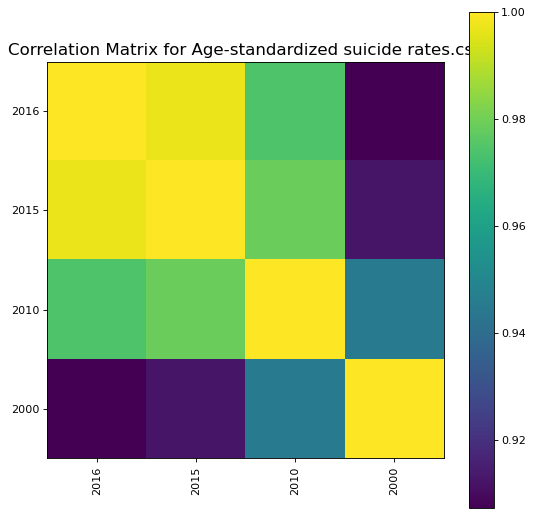

In [9]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

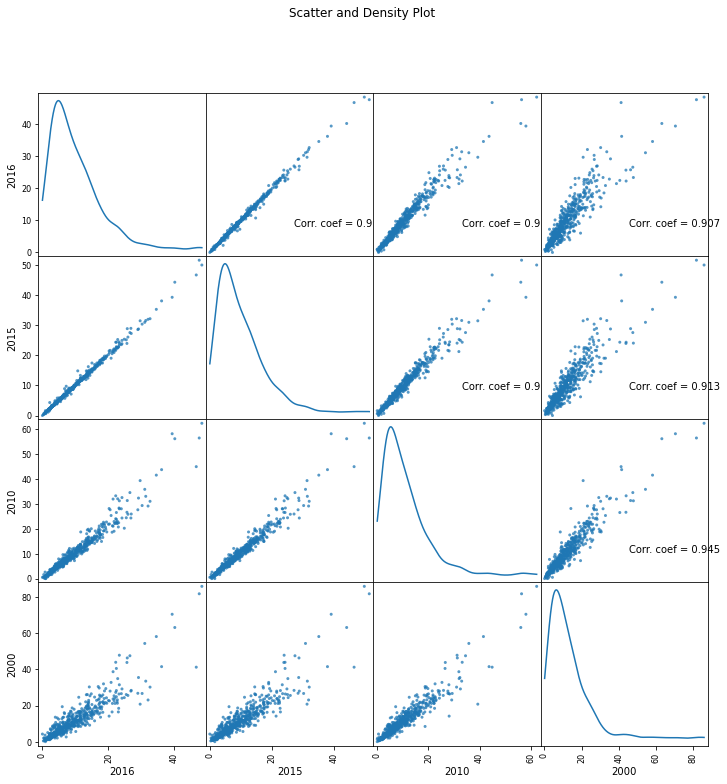

In [10]:
plotScatterMatrix(df1, 12, 10)

### Let's check 2nd file: Crude suicide rates.csv

In [11]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Crude suicide rates.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('D:/MH/Crude suicide rates.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'Crude suicide rates.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 549 rows and 10 columns


Let's take a quick look at what the data looks like:

In [12]:
df2.head(5)

,Country,Sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
0,Afghanistan,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1
1,Afghanistan,Male,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8
2,Afghanistan,Female,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2
3,Albania,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0
4,Albania,Male,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1


Distribution graphs (histogram/bar graph) of sampled columns:

<ipython-input-3-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


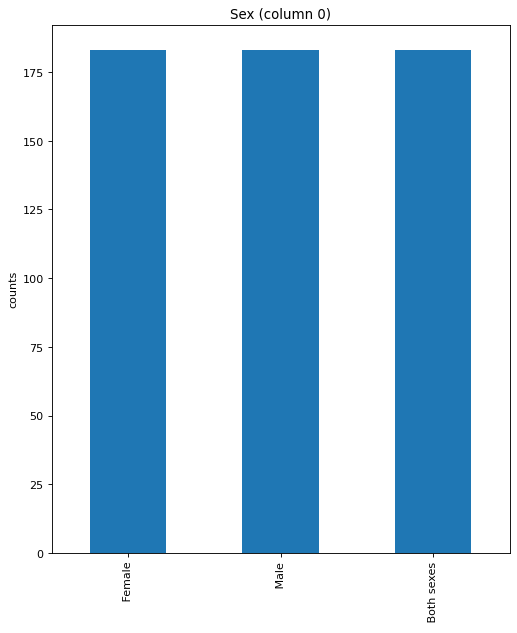

In [13]:
plotPerColumnDistribution(df2, 10, 5)

Correlation matrix:

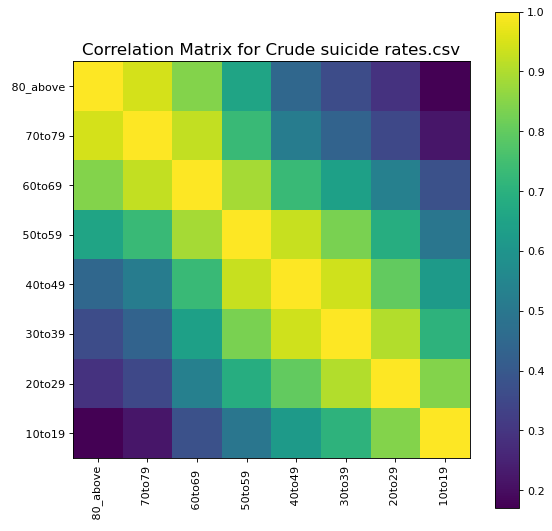

In [14]:
plotCorrelationMatrix(df2, 8)

Scatter and density plots:

In [ ]:
plotScatterMatrix(df2, 20, 10)

### Let's check 3rd file: Facilities.csv

In [15]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Facilities.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('D:/MH/Facilities.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'Facilities.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 112 rows and 7 columns


Let's take a quick look at what the data looks like:

In [16]:
df3.head(5)

,Country,Year,Mental _hospitals,health_units,outpatient _facilities,day _treatment,residential_facilities
0,Afghanistan,2016,0.003,0.012,0.006,NaN,NaN
1,Albania,2016,0.068,0.068,0.410,NaN,0.445
2,Algeria,2016,0.048,0.068,0.048,NaN,NaN
3,Angola,2016,0.011,NaN,NaN,NaN,0.014
4,Antigua and Barbuda,2016,1.001,NaN,NaN,NaN,NaN


Distribution graphs (histogram/bar graph) of sampled columns:

<ipython-input-3-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


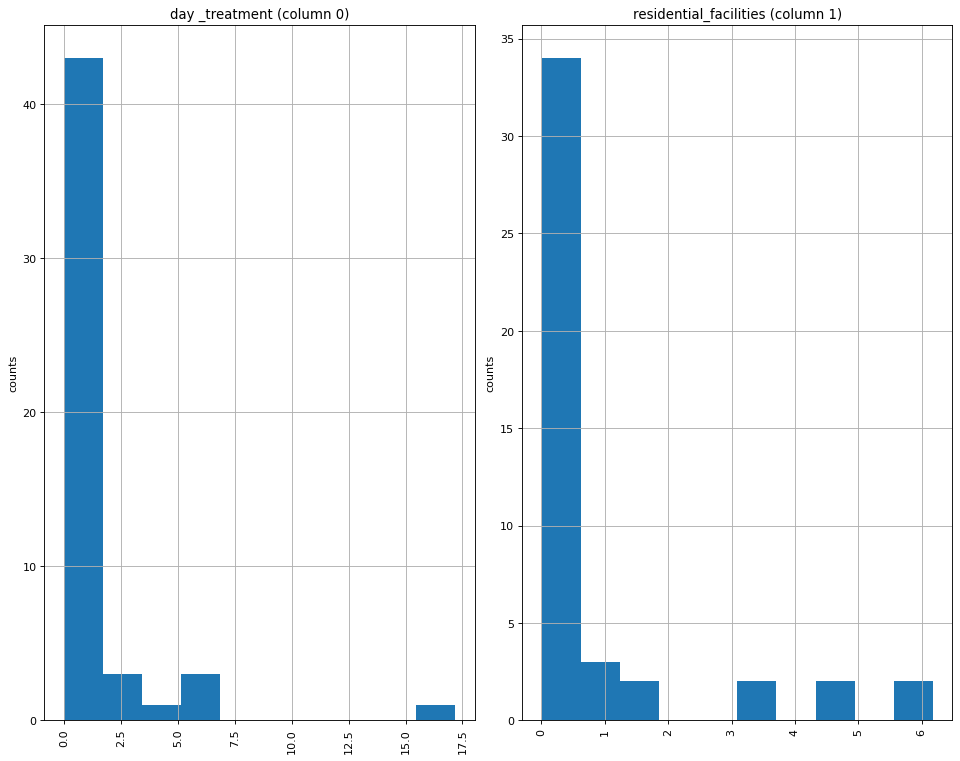

In [17]:
plotPerColumnDistribution(df3, 10, 5)

Correlation matrix:

In [18]:
plotCorrelationMatrix(df3, 8)

No correlation plots shown: The number of non-NaN or constant columns (1) is less than 2
